In [1]:
#Uncomment to download the library required to test CEC test functions
#!pip install opfunu

   ---------------------------------------- 0.0/13.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/13.0 MB 991.0 kB/s eta 0:00:14
   ---------------------------------------- 0.1/13.0 MB 1.2 MB/s eta 0:00:11
   ---------------------------------------- 0.1/13.0 MB 1.2 MB/s eta 0:00:11
   ---------------------------------------- 0.1/13.0 MB 654.9 kB/s eta 0:00:20
   ---------------------------------------- 0.1/13.0 MB 655.8 kB/s eta 0:00:20
   ---------------------------------------- 0.1/13.0 MB 655.8 kB/s eta 0:00:20
   ---------------------------------------- 0.1/13.0 MB 655.8 kB/s eta 0:00:20
   ---------------------------------------- 0.2/13.0 MB 399.3 kB/s eta 0:00:33
   ---------------------------------------- 0.2/13.0 MB 399.3 kB/s eta 0:00:33
   ---------------------------------------- 0.2/13.0 MB 399.3 kB/s eta 0:00:33
   ---------------------------------------- 0.2/13.0 MB 399.3 kB/s eta 0:00:33
   ---------------------------------------- 0.2/13.0 MB 399.3 kB/


[notice] A new release of pip is available: 24.0 -> 24.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
#Functions to handle with relative imports
import sys
sys.path.insert(1, '../DifferentialEvolution')

In [129]:
#Imports of class and functions required
from opfunu import get_functions_by_classname
from DifferentialEvolution_Clustering import DifferentialEvolution_Clustering
from DifferentialEvolution import DifferentialEvolution
from sklearn import cluster
from PlottingFunctions import PlottingSnapshots

In [128]:
def objectiveFunction(functionNumber:str,yearCEC:str='2017',dimension:int=2):
    """
        Function wrapper to return the function with the given requirements
        -- functionNumber : Function's number
        -- yearCEC : Function's year which belongs
        -- dimension : Function's dimensions
    """    
    function = get_functions_by_classname(f'F{functionNumber}{yearCEC}')[0](ndim=dimension)
    def objectiveFunction_inner(solutionVector):
        return function.evaluate(solutionVector)
    return objectiveFunction_inner

In [93]:
def individual(lower_bound:float=-100,upper_bound:float=100,dimension:int=2):
    """
        Function to create a random individual
        -- lower_bound : Minimum value to each individual's component
        -- upper_bound : Maximum value to each individual's component
        -- dimension : Individual's dimension
    """
    def individual_inner():
        from numpy import random
        individual = random.default_rng().uniform(lower_bound,upper_bound,dimension)
        return individual
    return individual_inner

In [117]:
# Dimensions = 2, 10, 20, 30, 50 or 100
# Domain [-100,100]**Dimension

lower , upper = -100 , 100
dimension = 2
objectiveFunction = objectiveFunction('9',dimension)
initializeIndividual = individual(lower,upper,dimension)
clusteringAlgorithm = cluster.dbscan

#DiffEvol = DifferentialEvolution(objectiveFunction,initializeIndividual)
DiffEvol_Clust = DifferentialEvolution_Clustering(objectiveFunction,initializeIndividual,clusteringAlgorithm)

In [118]:
iterations = 100
populationSize = 100
scalingFactor = 0.7
crossoverRate = 0.5
clusteringAlgorithm_kw = {'eps':5,'min_samples':3}

#optimalFound , snapshots = DiffEvol(iterations,populationSize,scalingFactor,crossoverRate)
optimalFound_clust , snapshots_clust = DiffEvol_Clust(iterations,populationSize,scalingFactor,crossoverRate,clusteringAlgorithm_kw)

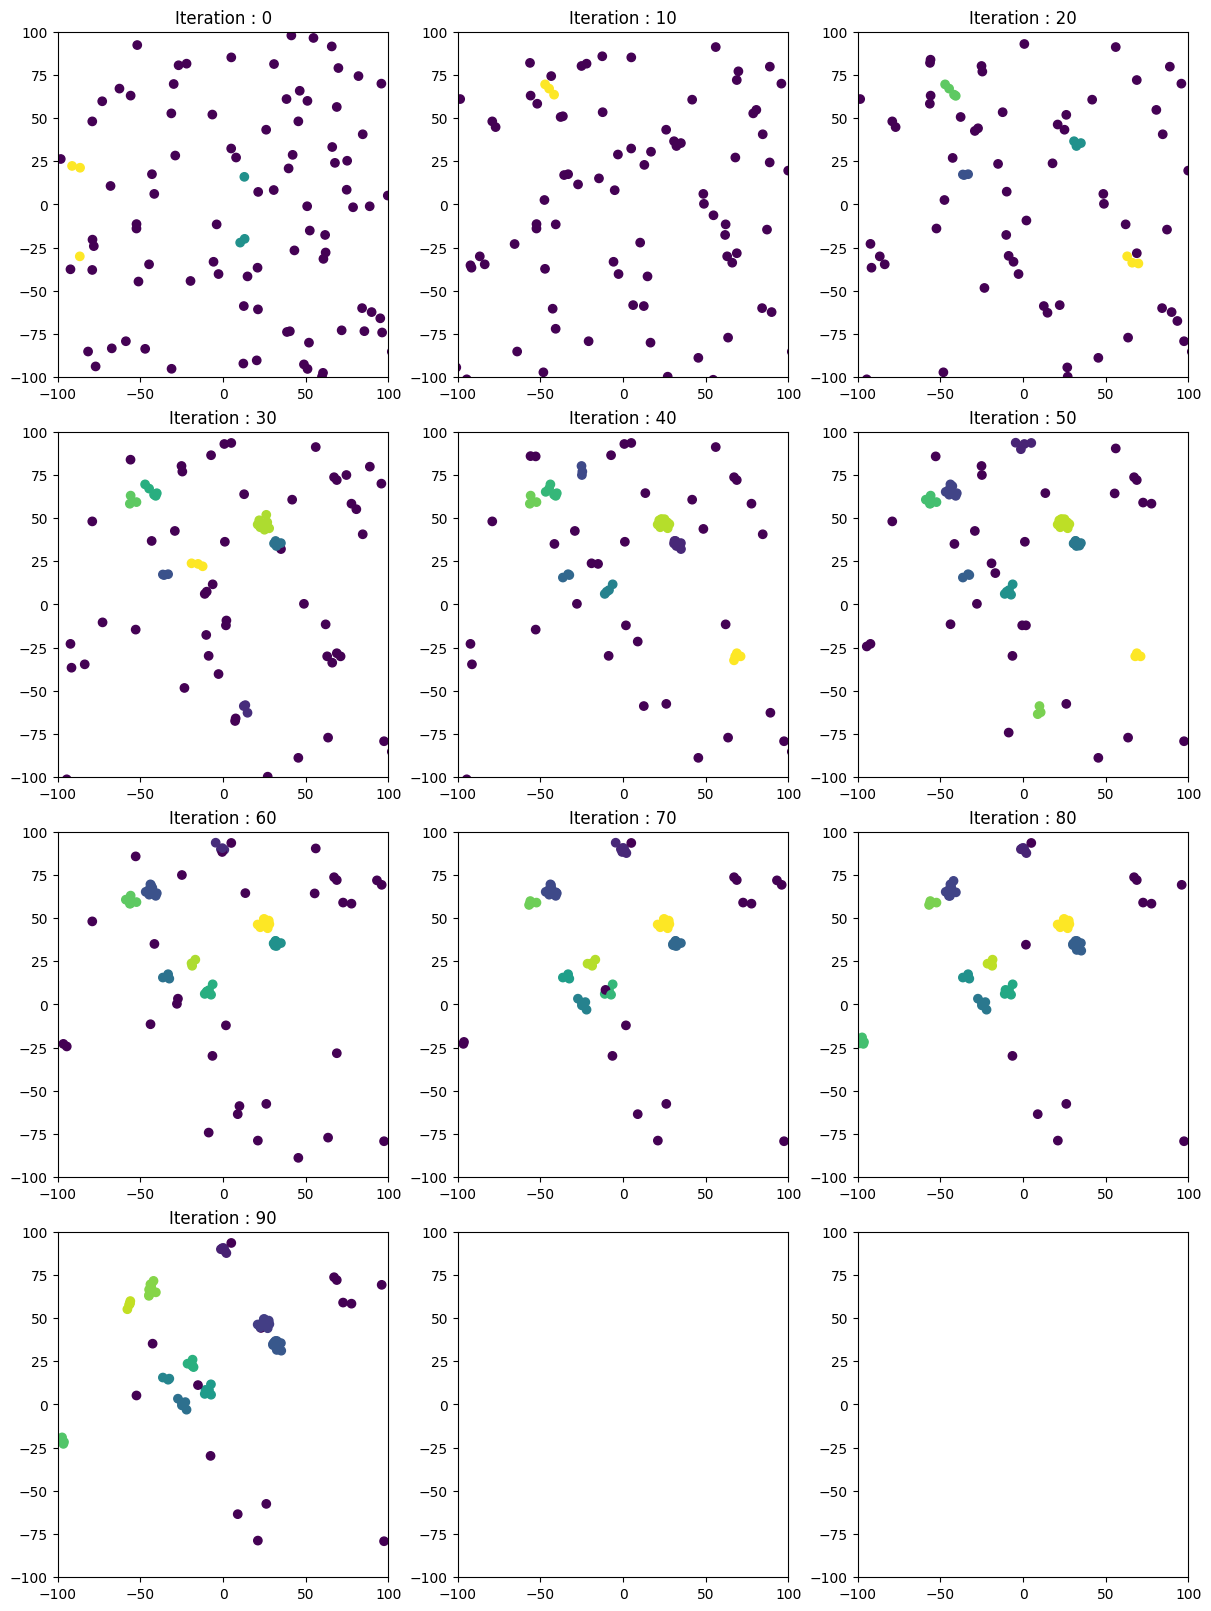

In [119]:
SubPlot_kw = {'autoscale_on':False,'xbound':(-100,100),'ybound':(-100,100)}

#PlottingSnapshots(snapshots,10,SubPlot_kw)
PlottingSnapshots(snapshots_clust,10,SubPlot_kw)